### Import Libraries

In [1]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV

from statsmodels.tsa.deterministic import DeterministicProcess
import seaborn as sns

### Import Dataset

In [2]:
df = pd.read_csv("restaurant.csv", index_col = "date", parse_dates = ["date"])
df.head()

,Unnamed: 0,waste_id,service_id,service,station,restaurant,food_item,weight,company_name,day,weekend,week
date,,,,,,,,,,,,
2022-01-10,0,16765,12,Dinner,Asian,Marina Canteen,Ash plant curry,3.41,Anantara Dhigu,Monday,0,2
2022-01-10,1,16763,12,Dinner,Western,Marina Canteen,Chickpea salad with tomato,3.21,Anantara Dhigu,Monday,0,2
2022-01-11,2,16351,11,Breakfast,Asian,Marina Canteen,Asian style stir fry noodle,3.59,Anantara Dhigu,Tuesday,0,2
2022-01-11,3,16770,12,Dinner,Asian,Marina Canteen,Banagla Roast Chicken,3.94,Anantara Dhigu,Tuesday,0,2
2022-01-11,4,17286,13,Lunch,Maldivian,Marina Canteen,Chicken Curry,3.46,Anantara Dhigu,Tuesday,0,2


### Select Asian Style Stir Fry Noodle Item

In [3]:
df_asian = df[df["food_item"] == "Asian style stir fry noodle"]
df_asian.head()

,Unnamed: 0,waste_id,service_id,service,station,restaurant,food_item,weight,company_name,day,weekend,week
date,,,,,,,,,,,,
2022-01-11,2,16351,11,Breakfast,Asian,Marina Canteen,Asian style stir fry noodle,3.590,Anantara Dhigu,Tuesday,0,2
2022-01-13,23,16361,11,Breakfast,Asian,Marina Canteen,Asian style stir fry noodle,3.980,Anantara Dhigu,Thursday,0,2
2022-01-15,44,16369,11,Breakfast,Asian,Marina Canteen,Asian style stir fry noodle,5.190,Anantara Dhigu,Saturday,1,2
2022-01-20,95,16398,11,Breakfast,Asian,Marina Canteen,Asian style stir fry noodle,3.990,Anantara Dhigu,Thursday,0,3
2022-01-22,115,16404,11,Breakfast,Asian,Marina Canteen,Asian style stir fry noodle,3.655,Anantara Dhigu,Saturday,1,3


**Select Relevant Column**

In [4]:
df_asian = df_asian[["weight"]]

### Line Plot of Waste Weight by Asian style stir fry noodle Item over Time

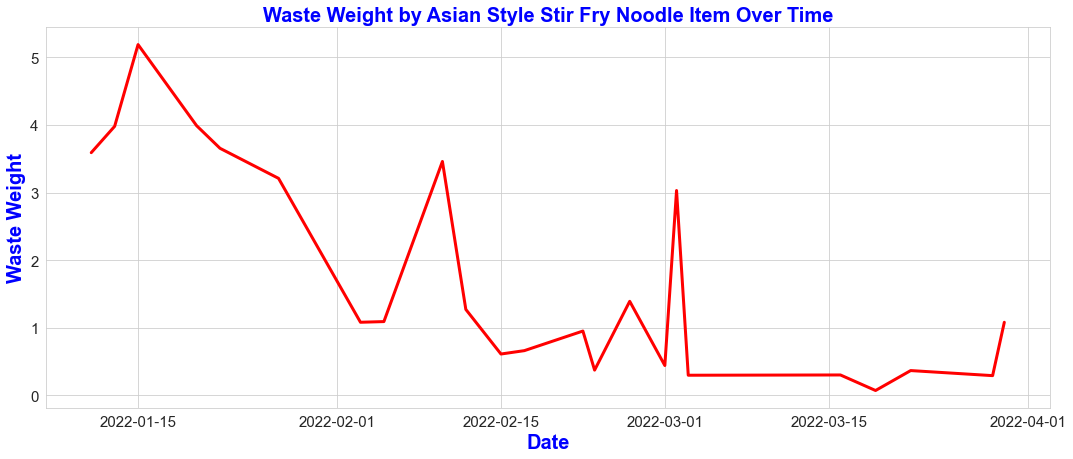

In [5]:
sns.set_style("whitegrid")
plt.figure(figsize = (18, 7))
sns.lineplot(x = df_asian.index, y = "weight", data = df_asian, color = "red", linewidth = 3)
plt.title("Waste Weight by Asian Style Stir Fry Noodle Item Over Time", color = "blue", weight = "bold", size = 20)
plt.xlabel("Date", color = "blue", weight = "bold", size = 20)
plt.ylabel("Waste Weight", color = "blue", weight = "bold", size = 20)
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.show()

### Prepare Data to do Forecasting for next day

In [6]:
dp = DeterministicProcess(df_asian.index, order=3)
X = dp.in_sample()
X_fore = dp.out_of_sample(steps=1)
X_fore.index = pd.date_range(start = "2022-03-31", freq = "D", periods = 1)

In [7]:
y = df_asian["weight"]

### Forecasting of Waste Weight by Asian style stir fry noodle Item by Support Vector Regression

In [8]:
svr = SVR()

svr.fit(X, y)

pred_svr = svr.predict(X)
pred_svr_forecast = svr.predict(X_fore)

### Plotting by Actual, Predicted and Forescated Values of Waste Weight

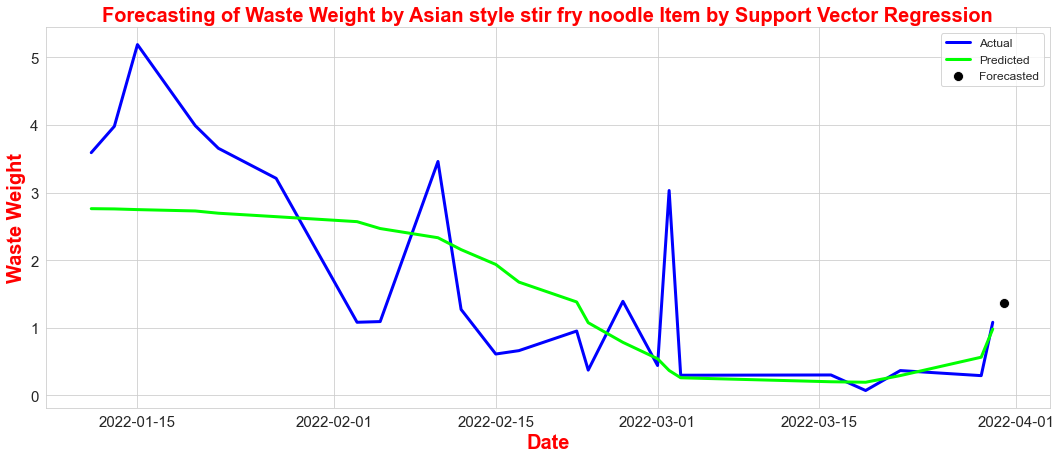

In [9]:
plt.figure(figsize = (18, 7))
sns.lineplot(x = df_asian.index, y = "weight", data = df_asian, color = "blue", label = "Actual", linewidth = 3)
sns.lineplot(x = df_asian.index, y = pred_svr, color = "lime", label = "Predicted", linewidth = 3)
sns.scatterplot(x = X_fore.index, y = pred_svr_forecast, color = "black", label = "Forecasted", s = 100)
plt.title("Forecasting of Waste Weight by Asian style stir fry noodle Item by Support Vector Regression", size = 20, color = "red", weight = "bold")
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.xlabel("Date", size = 20, color = "red", weight = "bold")
plt.ylabel("Waste Weight", size = 20, color = "red", weight = "bold")
plt.legend(fontsize='large', title_fontsize='40')
plt.show()

**Forecasting on next day**

In [10]:
print("Forecasted Waste Weight is", pred_svr_forecast)

Forecasted Waste Weight is [1.37096133]
